In [1]:
from sklearn.metrics import mean_squared_error, auc, accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split 

import xgboost as xgb 

import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('base-small.xlsx', na_values='-', index_col=0)

In [3]:
X = df.drop('Исход', 1) 
y = df['Исход']

/var/folders/pt/1nd8f39x3h116nnrbqlgpbdw0000gn/T/ipykernel_56989/50795730.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('Исход', 1)


In [4]:
dm = xgb.DMatrix(data=X,label=y) 

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify = y, test_size=0.3,random_state=0)

In [6]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
xgb_model.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[ 81  18]
 [ 14 165]]


In [7]:
#xgb.plot_importance(xgb_model)

In [8]:
#y_pred_proba = xgb_model.predict_proba(X_test)[::,1]

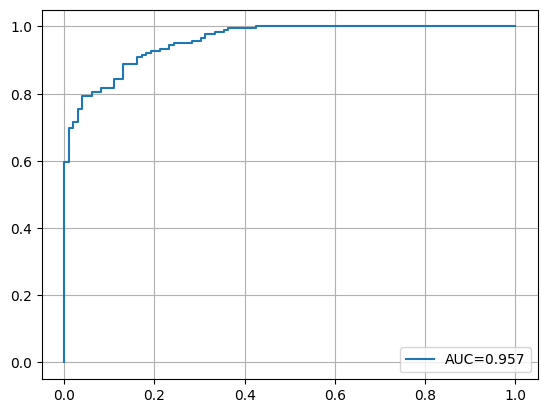

Accuracy: 0.8848920863309353
Precision 0.9016393442622951
Recall: 0.9217877094972067


In [9]:
from sklearn import metrics
y_pred_proba = xgb_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str('%.3f' % auc))
plt.grid()
plt.legend(loc=4)
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision",metrics.precision_score(y_test, y_pred))
print ("Recall:",metrics.recall_score(y_test, y_pred))